### Metadata

In [1]:
%cd ..

/Users/davidrestrepo/Data Fusion/DF-DM


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
DIR_PATH = 'datasets/violence_prediction/'
file = 'metadata_labels.csv'
cohort = 'cities.csv'

### Read file

In [4]:
cities = pd.read_csv(DIR_PATH + cohort)
cities

,lat,lng,Municipality,Municipality code,ISO
0,6.2447,-75.5748,Medellín,5001,CO-ANT
1,3.4400,-76.5197,Cali,76001,CO-VAC
2,4.5781,-74.2144,Soacha,25754,CO-CUN
3,4.1425,-73.6294,Villavicencio,50001,CO-MET
4,1.2136,-77.2811,Pasto,52001,CO-NAR
5,10.9639,-74.7964,Barranquilla,8001,CO-ATL
6,7.1186,-73.1161,Bucaramanga,68001,CO-SAN
7,4.4378,-75.2006,Ibagué,73001,CO-TOL
8,2.4411,-76.6061,Popayán,19001,CO-CAU
9,7.9075,-72.5047,Cúcuta,54001,CO-NSA


In [5]:
df = pd.read_csv(DIR_PATH + file)
df.head()

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,202322,202323,202324,202325,202326,202327,202328,202329,202330,202331
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,171,150,148,162,140,137,148,145,119,45
1,5002,Abejorral,20643,20944,21197,21355,20973,20067,19732,19796,...,2,1,0,0,1,0,0,4,0,0
2,5004,Abriaquí,2261,2290,2321,2353,2386,2424,2471,2488,...,0,0,0,0,0,0,0,0,0,0
3,5021,Alejandría,3935,4020,4096,4171,4244,4337,4419,4467,...,0,0,0,0,0,0,0,0,0,0
4,5030,Amagá,27996,28331,28624,28839,28776,28371,28259,28432,...,1,1,3,1,1,1,3,2,0,0


#### Get Cohort

In [6]:
# filter from df only the cities in the cohort
df = df[df['Municipality'].isin(cities['Municipality'])]
df

,Municipality code,Municipality,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,...,202322,202323,202324,202325,202326,202327,202328,202329,202330,202331
0,5001,Medellín,2286126,2309689,2331389,2353410,2379920,2410046,2428850,2436071,...,171,150,148,162,140,137,148,145,119,45
125,8001,Barranquilla,1166120,1178933,1191261,1203035,1213705,1222997,1229782,1231220,...,55,47,51,56,34,41,63,56,57,9
361,19001,Popayán,267499,270060,272730,275580,278598,280918,283410,287312,...,26,28,27,38,25,19,34,33,33,12
544,25754,Soacha,425088,434658,445502,459688,484624,521469,549235,569469,...,68,78,46,39,48,46,41,56,52,17
685,50001,Villavicencio,416457,428581,440768,452918,464534,475146,485565,495613,...,17,25,13,22,25,22,27,38,29,17
714,52001,Pasto,391184,392834,394200,395579,398441,401906,401525,399215,...,37,32,39,35,39,36,36,30,42,8
778,54001,Cúcuta,625064,632621,639844,646330,650910,653191,656235,659497,...,16,19,13,17,20,28,32,32,35,8
844,68001,Bucaramanga,544426,548584,552316,555887,560107,564983,568145,569954,...,31,27,22,30,27,30,26,23,13,5
957,73001,Ibagué,505035,503738,502794,502450,503439,505734,507360,509342,...,52,34,34,36,38,28,36,22,24,12
1004,76001,Cali,2119853,2126148,2132929,2142983,2161633,2187824,2200879,2205718,...,125,94,121,135,106,129,111,102,112,31


### EDA

### Metadata

In [7]:
df[df.columns[:53]].describe()

,Municipality code,Population2007,Population2008,Population2009,Population2010,Population2011,Population2012,Population2013,Population2014,Population2015,...,Householdswithoutwateraccess(%),Householdswithoutinternetaccess(%),Buildingstratification1(%),Buildingstratification2(%),Buildingstratification3(%),Buildingstratification4(%),Buildingstratification5(%),Buildingstratification6(%),NumberofhospitalsperKm2,NumberofhousesperKm2
count,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,43076.300000,8.746852e+05,8.825846e+05,8.903733e+05,8.987860e+05,9.095911e+05,9.224214e+05,9.310986e+05,9.363411e+05,9.393898e+05,...,3.08700,35.531000,21.696910,26.187990,22.292510,8.252610,2.669480,1.379920,0.950456,770.212919
std,26682.083685,7.416292e+05,7.461205e+05,7.502589e+05,7.548457e+05,7.611450e+05,7.689656e+05,7.728678e+05,7.731071e+05,7.700258e+05,...,1.91148,7.725436,6.449088,7.774275,7.654377,6.413291,2.212379,1.556868,1.126903,753.369767
min,5001.000000,2.674990e+05,2.700600e+05,2.727300e+05,2.755800e+05,2.785980e+05,2.809180e+05,2.834100e+05,2.873120e+05,2.924540e+05,...,0.88000,23.990000,12.111700,13.595400,11.620900,0.051500,0.036600,0.034900,0.157383,97.184792
25%,20689.250000,4.186148e+05,4.301002e+05,4.419515e+05,4.546105e+05,4.695565e+05,4.827930e+05,4.910138e+05,4.990452e+05,5.066430e+05,...,1.38000,30.857500,17.522475,21.492650,17.487600,5.498575,1.280350,0.135675,0.184777,127.033893
50%,51001.000000,5.247305e+05,5.261610e+05,5.275550e+05,5.291685e+05,5.317730e+05,5.432260e+05,5.586900e+05,5.697115e+05,5.801335e+05,...,3.04500,36.865000,20.068800,25.730600,20.045500,7.589200,2.224550,0.499650,0.276139,580.560367
75%,64501.000000,1.030856e+06,1.042355e+06,1.053407e+06,1.063859e+06,1.073006e+06,1.080546e+06,1.086395e+06,1.088289e+06,1.084025e+06,...,4.61000,38.892500,25.808800,31.441525,26.999525,9.231525,2.865450,2.489075,1.429792,1089.896657
max,76001.000000,2.286126e+06,2.309689e+06,2.331389e+06,2.353410e+06,2.379920e+06,2.410046e+06,2.428850e+06,2.436071e+06,2.431666e+06,...,5.99000,48.980000,34.315100,39.787700,38.180200,24.392700,6.572500,3.840000,3.433735,2102.057895


### Labels

In [8]:
from src.Preprocessing.time_series_preprocessing import read_labels

In [9]:
labels = read_labels(df)
labels.index = labels.index.astype(int)
labels

,Medellín,Barranquilla,Popayán,Soacha,Villavicencio,Pasto,Cúcuta,Bucaramanga,Ibagué,Cali
201751,81,12,25,35,25,23,10,48,8,37
201752,77,11,16,35,12,32,4,25,3,12
201801,120,20,25,62,28,47,18,59,10,90
201802,136,29,28,37,31,40,14,29,17,64
201803,144,27,29,37,26,24,16,36,13,80
...,...,...,...,...,...,...,...,...,...,...
202249,157,48,23,56,40,26,25,28,41,108
202250,117,34,25,24,26,24,18,12,31,110
202251,98,43,18,20,22,26,18,7,29,97
202252,77,46,15,16,35,21,10,6,17,54


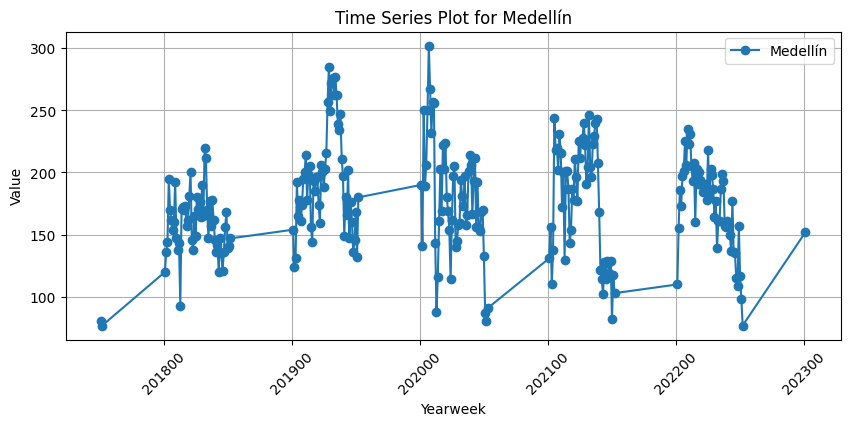

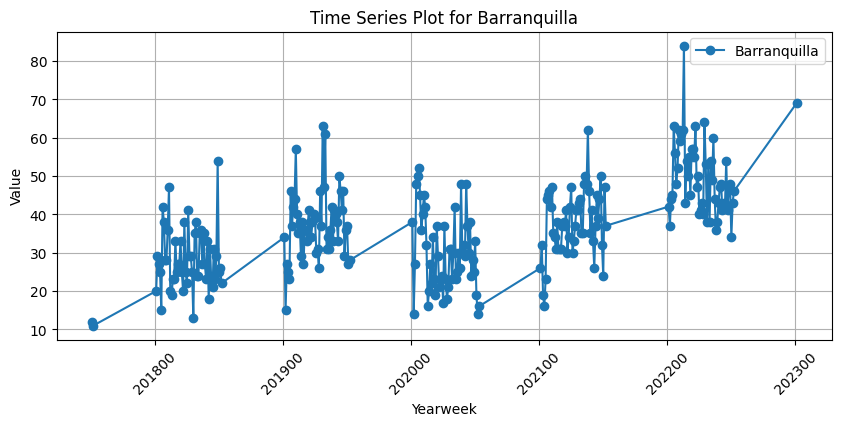

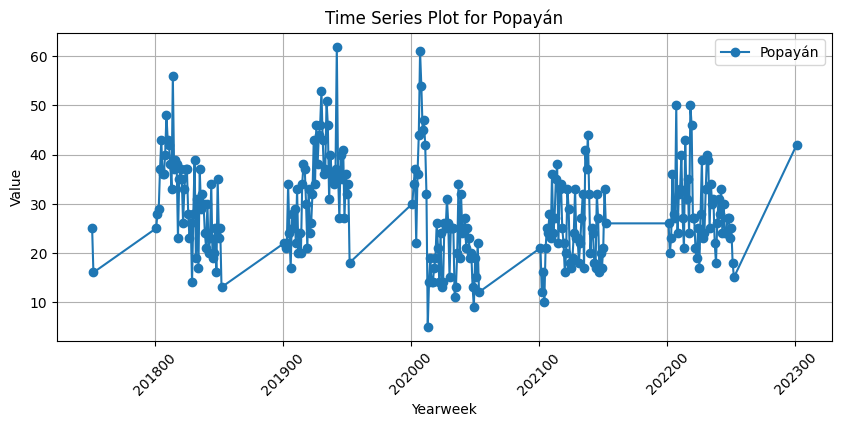

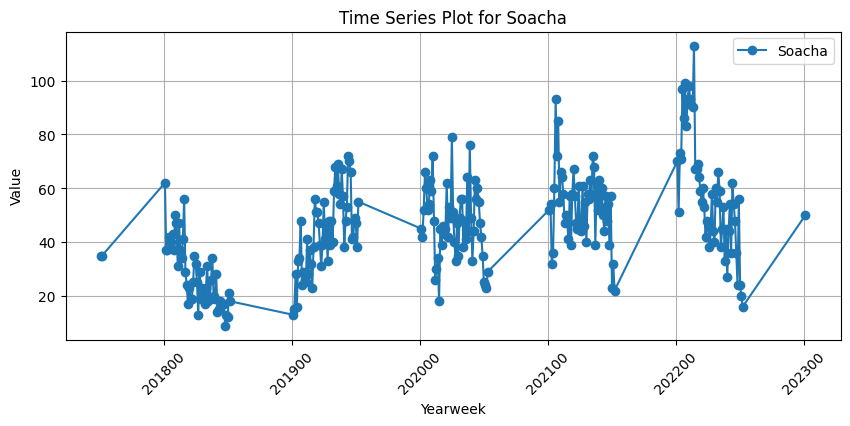

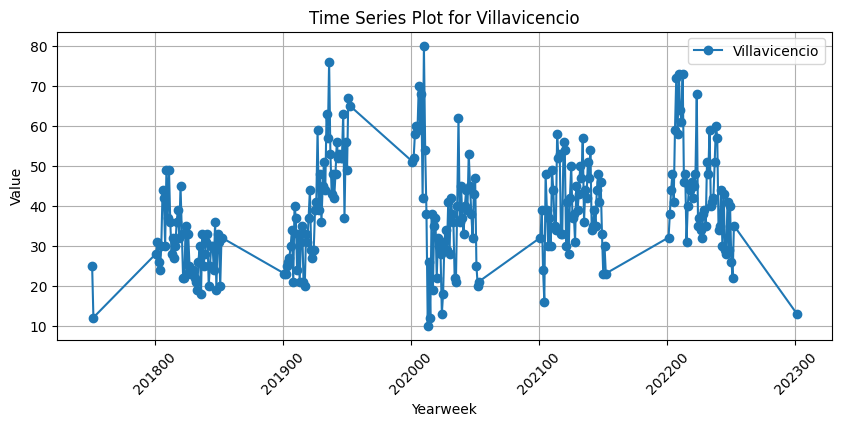

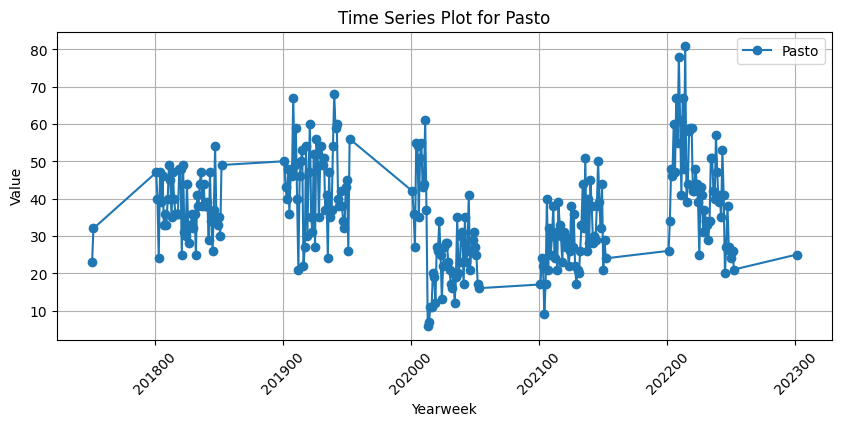

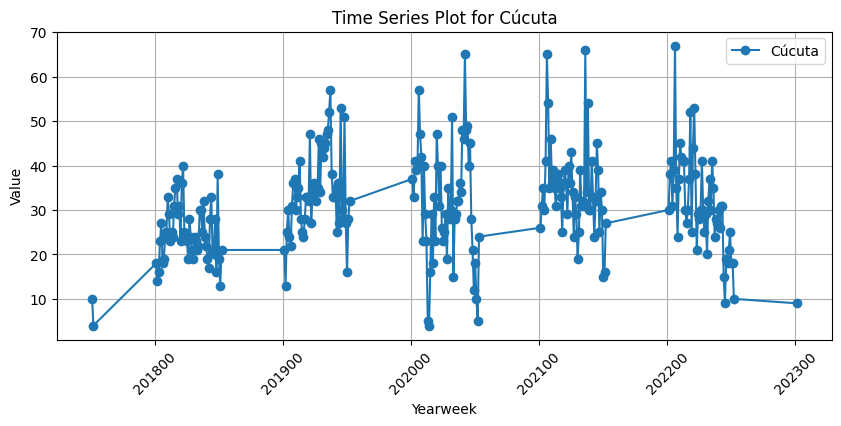

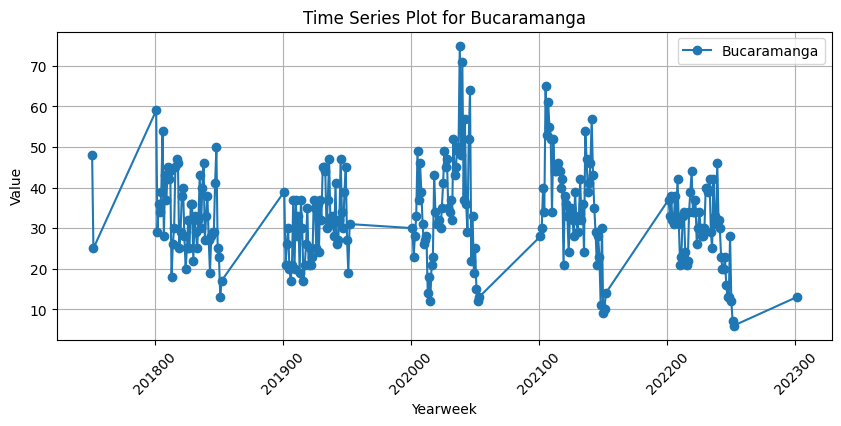

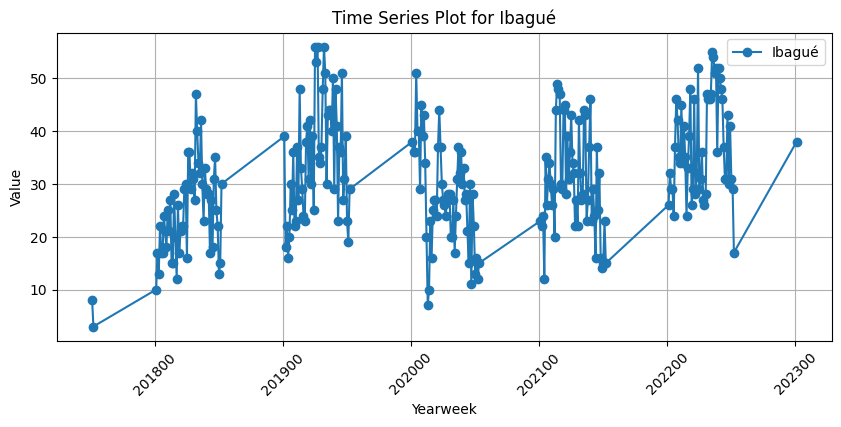

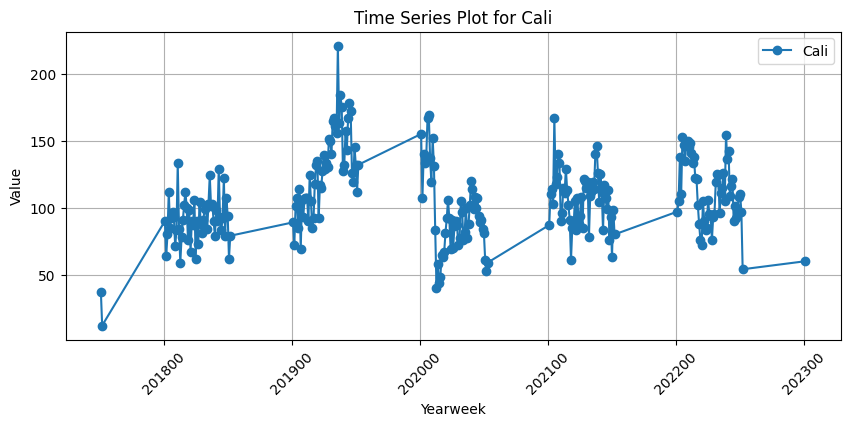

In [10]:
for column in labels.columns:
    plt.figure(figsize=(10, 4))
    plt.plot(labels.index, labels[column], marker='o', linestyle='-', label=column)
    plt.title(f'Time Series Plot for {column}')
    plt.xlabel('Yearweek')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

### Predictions

In [11]:
from src.Preprocessing.time_series_preprocessing import read_static, read_features

In [12]:
from src.Preprocessing.time_series_preprocessing import get_dengue_dataset, train_test_split, normalize_train_features, normalize_test_features, series_to_supervised, features_labels_set, reshape_tensor

import pandas as pd
import os
import numpy as np

In [13]:
Municipalities = cities.Municipality.values

In [16]:
# Read dataset
#dengue_df = [get_dengue_dataset(labels_path=df, embeddings_path='Embeddings/Embeddings_dinov2_large.csv', municipality=Municipality, temp_prec='datasets/violence_prediction/media_data.csv').drop(columns=['Municipality code']) for Municipality in Municipalities]
dengue_df = [get_dengue_dataset(labels_path=df, embeddings_path=None, municipality=Municipality, temp_prec=None) for Municipality in Municipalities]
type(dengue_df)

list

In [17]:
dengue_df[0]

,Medellín
201751,81
201752,77
201801,120
201802,136
201803,144
...,...
202248,109
202249,157
202250,117
202251,98
